In [2]:
#Importaciones basicas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# graficos incrustados
%matplotlib inline
BBVA_train = pd.read_csv('clientes_train.csv', header=0)
BBVA_train.shape

(70000, 51)

In [3]:
BBVA_train.ix[:100, :54]

,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,201208,1,0,0,0,6.000000,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
1,201208,1,1,1,0,0.000000,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
2,201208,1,2,1,1,4.000000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201208,1,3,1,2,5.000000,3,0,0,0,...,3,3,3,3,1,1,1,1,1,1
4,201208,1,2,0,0,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,201208,0,4,0,0,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,201208,1,3,1,3,0.000000,4,0,0,0,...,3,2,2,2,1,1,1,1,1,1
7,201208,0,2,1,0,0.000000,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,201208,0,2,0,1,0.000000,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,201208,1,0,0,0,7.000000,6,0,0,0,...,5,5,5,5,0,1,0,1,1,1


In [5]:
list_head_select = ['RANG_INGRESO',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SSFF_MENOS2',
 'NRO_ENTID_SSFF_MENOS3',
 'NRO_ENTID_SSFF_MENOS4',
 'NRO_ENTID_SSFF_MENOS5']
X = BBVA_train.loc[:,list_head_select].values
X

array([[ 0.,  0.,  6., ...,  1.,  1.,  1.],
       [ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 2.,  1.,  4., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  2.,  4., ...,  4.,  4.,  4.],
       [ 0.,  1.,  7., ...,  3.,  3.,  3.],
       [ 5.,  0.,  6., ...,  2.,  2.,  2.]])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler()
escala.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
escalada = escala.transform(X)
pca.fit(escalada)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
transformada = pca.transform(escalada)
transformada.shape

(70000, 2)

In [19]:
yy = pd.read_csv('clientes_procesado.csv', header=0)['ATTRITION']
yy.shape

(70000,)

/home/villacorta/anaconda3/lib/python3.6/site-packages/mglearn/plot_helpers.py:95: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,


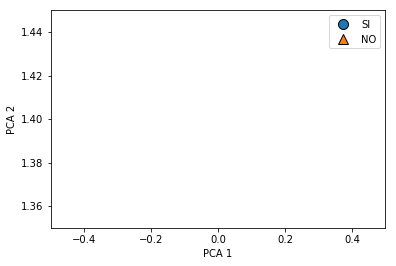

In [44]:
import mglearn
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], yy)
plt.legend(['SI', 'NO'], loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [60]:
transformada_simple = pca.transform(X)
transformada_simple.shape

(70000, 2)

/home/villacorta/anaconda3/lib/python3.6/site-packages/mglearn/plot_helpers.py:95: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,


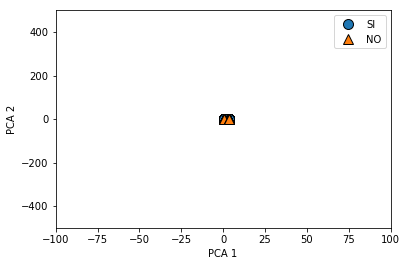

In [61]:
mglearn.discrete_scatter(transformada_simple[:,0], transformada_simple[:,1], yy)

plt.xlim(-100, 100)
plt.ylim(-500, 500)
plt.legend(['SI', 'NO'], loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')